In [77]:
#import all the necessary libraraies
import pandas as pd
import numpy as np


In [78]:
#defining the path and seting the index column as id
fpath = "/content/traffic_dataset_with_weekdays (1) (1).xlsx"
df = pd.read_excel(fpath)
df['ID'] = df.index
df = df.set_index('ID')
df.head()


,Timestamp,Weekday,Cross 1,Cross 2,Cross 3,Cross 4,Cross 5,Cross 6
ID,,,,,,,,
0,2024-01-01 00:00:00,Monday,105.0,48.0,30,62.0,31,110.0
1,2024-01-01 00:05:00,Monday,97.0,41.0,32,55.0,42,103.0
2,2024-01-01 00:10:00,Monday,76.0,47.0,44,58.0,40,100.0
3,2024-01-01 00:15:00,Monday,98.0,40.0,39,59.0,43,104.0
4,2024-01-01 00:20:00,Monday,87.0,41.0,47,49.0,35,112.0


In [79]:
#checking dataframe
df

,Timestamp,Weekday,Cross 1,Cross 2,Cross 3,Cross 4,Cross 5,Cross 6
ID,,,,,,,,
0,2024-01-01 00:00:00,Monday,105.0,48.0,30,62.0,31,110.0
1,2024-01-01 00:05:00,Monday,97.0,41.0,32,55.0,42,103.0
2,2024-01-01 00:10:00,Monday,76.0,47.0,44,58.0,40,100.0
3,2024-01-01 00:15:00,Monday,98.0,40.0,39,59.0,43,104.0
4,2024-01-01 00:20:00,Monday,87.0,41.0,47,49.0,35,112.0
...,...,...,...,...,...,...,...,...
11514,2024-02-23 23:35:00,Friday,55.0,33.0,31,46.0,28,57.0
11515,2024-02-23 23:40:00,Friday,45.0,29.0,18,57.0,29,69.0
11516,2024-02-23 23:45:00,Friday,46.0,21.0,22,39.0,29,69.0


In [80]:
#checking for null values in our dataframe
df.isna().sum()

,0
Timestamp,0
Weekday,0
Cross 1,0
Cross 2,0
Cross 3,0
Cross 4,14
Cross 5,0
Cross 6,0


In [81]:
#defining the columns that we do have in the dataframe
df.columns

Index(['Timestamp', 'Weekday', 'Cross 1', ' Cross 2', ' Cross 3', ' Cross 4',
       ' Cross 5', ' Cross 6'],
      dtype='object')

In [82]:
df.shape
# len(df)

(11519, 8)

In [83]:
#checking for duplicate values in the dataframe
df.duplicated()

,0
ID,
0,False
1,False
2,False
3,False
4,False
...,...
11514,False
11515,False
11516,False


In [84]:
#checking sum of dupllicates
df.duplicated().sum()

np.int64(0)

[Text(0.5, 0, 'Cross 4'), Text(0.5, 1.0, 'distribution of traffic in cross 4')]

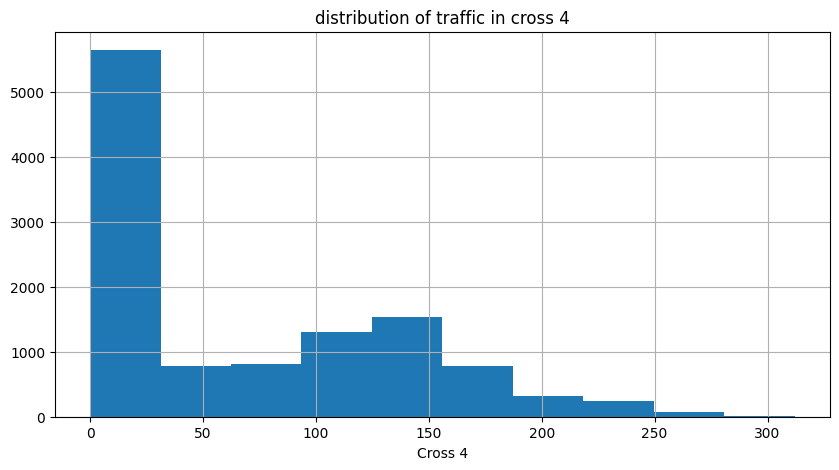

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
df.columns = df.columns.str.strip()
fig, ax = plt.subplots(figsize=(10,5))
x = df['Cross 4'].hist()
ax.set(xlabel = "Cross 4", title = "distribution of traffic in cross 4")

The histogram of Cross 1 shows that the majority of traffic counts are higher on the end, with few lower traffic volumes.
The distribution starts with high frequencies and gradually decreases as the values reduce, indicating a left-skewed distribution.

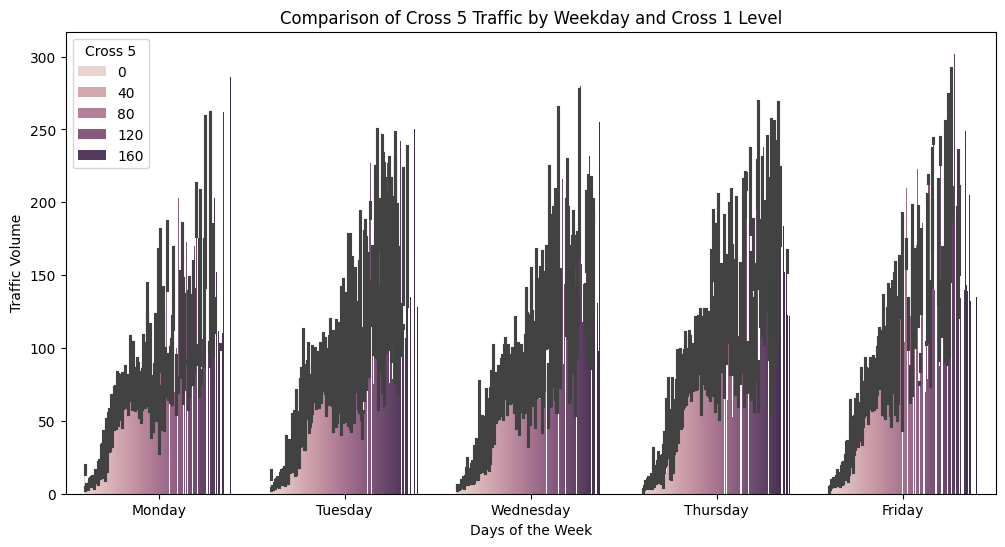

In [86]:
plt.figure(figsize=(12,6))
sns.barplot(x="Weekday", y="Cross 2", hue="Cross 5", data=df)
plt.title("Comparison of Cross 5 Traffic by Weekday and Cross 1 Level")
plt.xlabel("Days of the Week")
plt.ylabel("Traffic Volume")
plt.show()


The multivariate bar chart shows how traffic at Cross 2 varies across the days of the week, while also comparing it with cross 5


In [87]:
# defining the x and y
y = df['Cross 6']
x = df.drop( columns = ['Cross 6', 'Timestamp'])

In [88]:
#selecting numerical coulmns
num_cols = x.select_dtypes('number').columns
num_cols

Index(['Cross 1', 'Cross 2', 'Cross 3', 'Cross 4', 'Cross 5'], dtype='object')

In [89]:
#catergorical columns
cat_cols = x.select_dtypes('object').columns
cat_cols

Index(['Weekday'], dtype='object')

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#imputing
numerical_meadian = SimpleImputer(strategy = 'median')

#scaling
scaler = StandardScaler()
#ordinal encoding
ordinal_encoder = OrdinalEncoder()

In [91]:
#creating transformers
num_transformer = Pipeline(steps = [
    ('imputer', numerical_meadian),
    ('scaler', scaler)
])

ordinal_transformer=Pipeline(
    steps=[('ord_enc',ordinal_encoder)]
    )

In [92]:
#combining transformers
df_traffic_preprocessor = ColumnTransformer(
     transformers =[
         ('numeric', num_transformer, num_cols),
         ('ordinal', ordinal_transformer,cat_cols)
     ],
     remainder='passthrough'
)

In [93]:
#use pipeline for the preprocessor and the model
df_pipline = Pipeline(steps=[
    ('preprocessor', df_traffic_preprocessor),
    ('regressor', LinearRegression())
])

In [94]:
#spliting the dataset
x_train, x_test, y_train, y_test = train_test_split( x,y, test_size = 0.3, random_state = 42)

In [95]:
#institiate the regsresoor
# linear_regressor = LinearRegression()

In [96]:
#training phase
df_pipline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Cross 1', 'Cross 2', 'Cross 3', 'Cross 4', 'Cross 5'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Weekday'], dtype='object'))])),
                ('regressor', LinearRegression())])

prediction

In [97]:
# Use the trained model to predict target values for the test dataset
y_predict = df_pipline.predict(x_test)
y_predict

array([  7.31312024, 136.08454221,  15.16328729, ..., 141.7146305 ,
       108.65883397,  14.00689765])

In [98]:
# Evaluate model performance on test data using R² score (coefficient of determination)
r2 = r2_score(y_test, y_predict)
print("R²:", r2)

R²: 0.8540013437773113


In [99]:
# average of squared prediction errors
print(mean_absolute_error(y_test, y_predict))

17.949392956027342


In [100]:
#Mean Squared Error (MSE) – average of squared prediction errors
print(mean_squared_error(y_test, y_predict))

711.018527032773


In [101]:
# Evaluate the model's performance (R² score) on the training dataset and test dataset
print(df_pipline.score(x_train, y_train))
print(df_pipline.score(x_test, y_test))

0.843308088803285
0.8540013437773113


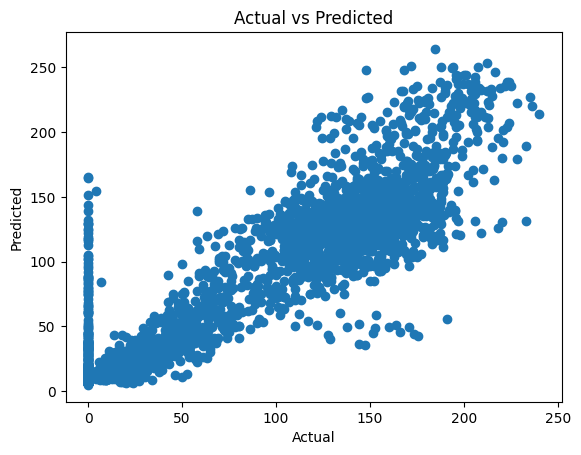

In [102]:
import matplotlib.pyplot as plt
# Creates a scatter plot to compare actual vs predicted values
plt.scatter(y_test, y_predict)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()


SECOND ALGORITHM(DECISION TREE REGRESSOR)

In [103]:
from sklearn.tree import DecisionTreeRegressor

In [104]:
# Creates a pipeline for a Decision Tree Regressor
df_pipline_tree = Pipeline(steps=[
    ('preprocessor', df_traffic_preprocessor),
    ('regressor', DecisionTreeRegressor())
])

In [105]:

# Fits the pipeline on the training data
df_pipline_tree.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Cross 1', 'Cross 2', 'Cross 3', 'Cross 4', 'Cross 5'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Weekday'], dtype='object'))])),
                ('regressor', DecisionTreeRegressor())])

In [106]:
y_predict_tree = df_pipline_tree.predict(x_test)
y_predict_tree

array([  0. , 190. ,  11. , ..., 139. , 136. ,   7.5])

In [107]:
# Evaluate model performance on test data using R² score (coefficient of determination
r2 = r2_score(y_test, y_predict_tree)
print("R²:", r2)

R²: 0.8444977258390076


In [108]:
#mean absolute errro calculates the average absolute difference between predicted and actual values
tree_mae = mean_absolute_error(y_test, y_predict_tree)
print("Mean Absolute Error:", tree_mae)

Mean Absolute Error: 15.408323688271604


In [109]:
#Mean Squared Error calculates the  average of squared prediction errors
print(mean_squared_error(y_test, y_predict_tree))

757.3014764981997


In [110]:
#comparing the agorithms
print("Linear Regression R²:", r2_score(y_test, y_predict))
print("Decision Tree R²:", r2_score(y_test, y_predict_tree))


Linear Regression R²: 0.8540013437773113
Decision Tree R²: 0.8444977258390076


In [111]:
#saving the model
import pickle
file_name_tree = "decision_tree_pipeline.sav"
file_name_linear = "linear_regression_pipeline.sav"

pickle.dump(df_pipline_tree, open(file_name_tree, 'wb'))
pickle.dump(df_pipline, open(file_name_linear, 'wb'))

In [112]:
# Loads a previously saved Linear Regression pipeline from a file and Decision Tree pipeline from a file
load_tree_pipeline = pickle.load(open('decision_tree_pipeline.sav', 'rb'))

load_linear_pipeline = pickle.load(open('linear_regression_pipeline.sav', 'rb'))

print("Decision Tree Pipeline loaded successfully:", load_tree_pipeline)
print("Linear Regression Pipeline loaded successfully:", load_linear_pipeline)

Decision Tree Pipeline loaded successfully: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Cross 1', 'Cross 2', 'Cross 3', 'Cross 4', 'Cross 5'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('ord_enc',
                                                                   OrdinalEncoder())]),
                                                  Index(['Weekday'], dtype='object'))])),
         